# Визуальный анализ данных

Для того чтобы выбрать подходящую модель предсказания, нужно представлять себе форму данных. Простое просматривание статистических показателей среднего, отклонения, медианы и так далее не может рассказать всего. Хочется посмотреть на графики.

А когда работа готова, то всегда требуется показать на графиках некоторые результаты.

Именно поэтому важно уметь строить графики по данным и анализировать по ним саму выборку и придумывать гипотезы.

![](https://matplotlib.org/_static/logo2.svg)

![](https://media.giphy.com/media/xT4Ap5ELYhIvIyYKfC/giphy.gif)

В Python основной библиотекой для рисваония графиков является [Matplotlib](https://matplotlib.org/). Другие библиотеки с очень большой вероятностью внутри основываются на ней.

![](https://i.imgur.com/0IsVEaI.png)

Еще одна библиотека для рисования графиков [seaborn](http://seaborn.pydata.org/index.html). В ней есть отличная интеграция с pandas. Многие типичные графики там уже реализованы, поэтому не придется их рисовать с нуля на низкоуровневом matplotlib.

![](https://raw.githubusercontent.com/cldougl/plot_images/add_r_img/plotly_2017.png)

[Plotly](https://plot.ly/python/reference) — это open-source библиотека, которая позволяет строить интерактивные графики в jupyter.notebook'e без необходимости зарываться в javascript код.

Прелесть интерактивных графиков заключается в том, что можно посмотреть точное численное значение при наведении мыши, скрыть неинтересные ряды в визуализации, приблизить определенный участок графика и т.д.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Чтобы графики выводились в jupyter надо выполнить эту магическую команду
%matplotlib inline

pd.set_option('display.max_columns',150)  # выводим максимум 150 колонок для pandas ( по умолчанию там около 10)

Проверим, что matplotlib действительно рисует графики в самом jupyter ноутбуке. Кстати, сразу увидим bar, scatter plot, который часто используют в анализе данных.

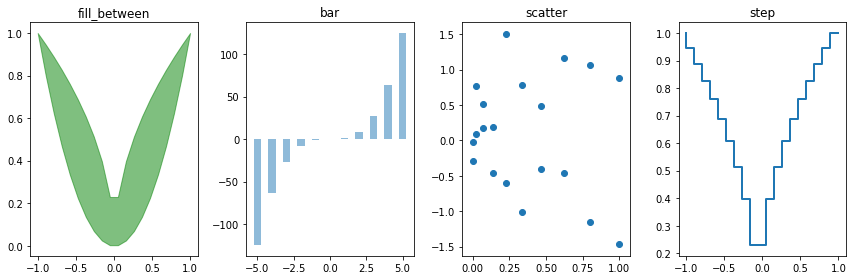

In [2]:
x = np.linspace(-1.0, 1.0, 20)

fig, axes = plt.subplots(1, 4, figsize = (12, 4)) # создаем плот, состоящий из 4 графиков.

axes[0].fill_between(x, np.sqrt(np.abs(x)), x**2, 
                     color="green", alpha=0.5);
axes[0].set_title("fill_between");

axes[1].bar(np.arange(-5, 6), np.arange(-5, 6)**3, 
            align="center", width=0.5, alpha=0.5)
axes[1].set_title("bar")

axes[2].scatter(x**2, x + 0.5 * np.random.randn(len(x)))
axes[2].set_title("scatter")

axes[3].step(x, np.sqrt(np.abs(x)), lw=2)
axes[3].set_title("step")

fig.tight_layout() # выравниваем и рисуем графики

Рассмотрим [данные](https://www.kaggle.com/miroslavsabo/young-people-survey) одного опроса молодых людей 2013 года. В нём молодёж опрашивали по следующим группам вопросов:
- Музыкальные предпочтения (19)
- Предпочтения в фильмах (12)
- Хобби и интересы (32)
- Фобии (10)
- Привычки связанные со здоровьем (3)
- Персональные точки зрения на жизнь (57)
- Денежные траты (7)
- Демографические данные (10)

In [3]:
df = pd.read_csv('../../data/young-people-survey.csv.gz', compression='gzip')
print(df.shape)
df.head(2)

(1010, 150)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


In [4]:
# добавим индекс массы тела

df['all'] = ''
df['BMI'] = round(df['Weight']/((df['Height']/100)**2),1)

# удалим некоторые выбросы и ошибки
df.drop([676,885,992, 859], inplace = True)

In [5]:
df.describe() # посмотрим статистическую сводку о данных

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,BMI
count,1003.000000,1004.000000,1002.000000,1001.000000,1001.000000,999.000000,1004.000000,1003.000000,1000.000000,1003.000000,998.000000,1002.000000,999.000000,1000.000000,999.000000,999.000000,998.000000,999.000000,1005.000000,1000.000000,1004.000000,1005.000000,1003.000000,1003.000000,1004.000000,1004.000000,1003.000000,1003.000000,998.000000,1002.000000,1004.000000,1004.000000,1001.000000,1005.000000,1003.000000,1003.000000,1002.000000,1000.000000,1001.000000,1000.000000,996.000000,1000.000000,997.000000,1001.000000,1001.000000,1005.000000,1002.000000,1000.000000,1003.000000,999.000000,1003.000000,1005.000000,1000.000000,991.000000,1002.000000,999.000000,1004.000000,1004.000000,1000.000000,998.000000,1002.000000,1003.000000,1002.000000,1003.000000,1005.000000,1004.000000,1003.000000,1001.000000,1006.000000,1003.000000,1005.000000,1005.000000,1005.000000,1003.000000,999.000000,1001.000000,1003.000000,1001.000000,1003.000000,999.000000,1002.000000,1005.000000,1002.000000,1000.000000,1002.000000,1005.000000,999.000000,1002.000000,1003.000000,1001.000000,1002.000000,1002.00000,1001.000000,1006.000000,1000.000000,999.000000,1004.000000,1005.000000,1003.000000,1005.000000,1004.000000,1004.000000,1006.000000,1003.000000,1006.000000,1003.000000,1004.000000,1002.000000,1003.000000,1001.000000,1004.000000,1000.000000,1002.000000,1004.000000,1002.000000,1004.000000,1004.000000,1003.000000,1003.000000,1002.000000,1001.000000,1002.000000,1002.000000,1002.000000,1001.000000,1003.000000,1004.000000,1002.000000,1003.000000,1004.000000,1004.000000,1003.000000,1003.000000,1006.000000,1004.000000,999.000000,987.000000,986.000000,1000.000000,977.000000
mean,4.733799,3.326693,3.112774,2.288711,2.122877,2.956957,2.763944,3.473579,3.764000,2.358923,2.458918,2.908184,2.769770,2.762000,3.146146,2.830831,2.845691,2.334334,2.141294,4.614000,2.793825,3.383085,4.497507,3.493519,3.116534,3.153386,3.749751,3.787637,3.642285,2.127745,3.537849,3.206175,3.144855,2.596020,2.333998,2.064806,4.175649,3.141000,2.643357,2.665000,2.164659,3.163000,3.081244,3.779221,2.518482,2.252736,2.684631,2.592000,2.276171,3.687688,2.466600,2.329353,1.901000,3.384460,3.295409,1.905906,2.360558,3.278884,3.231000,3.024048,4.555888,2.952144,3.334331,2.063809,

Прежде чем мы перейдем к рассмотрению методов библиотек seaborn и plotly, обсудим самый простой и зачастую удобный способ визуализировать данные из pandas DataFrame — это воспользоваться функцией plot.

Для начала проанализируем количество пропусков в данных и визуализируем это.

Как мы видим часто пропускают:
- вес
- рост (???)

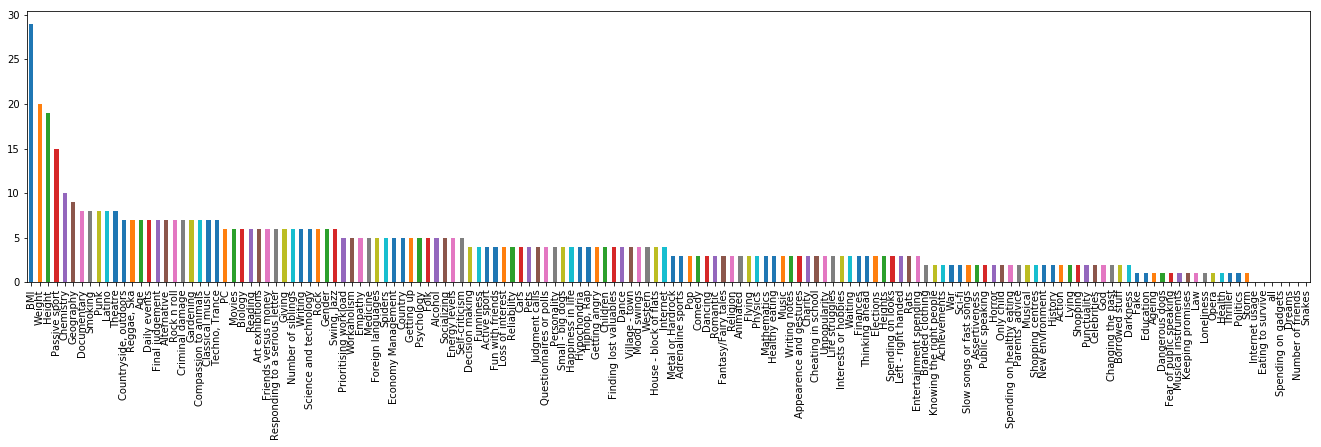

In [6]:
nulls = df.isnull().sum().sort_values(ascending=False)
_ = nulls.plot(kind='bar', figsize = (23,5))

In [7]:
print('Number of girls who omitted weight field: {:.0f}'.format(df[df['Gender']=='female']['Weight'].isnull().sum()))
print('Number of boys who omitted weight field: {:.0f}'.format(df[df['Gender']=='male']['Weight'].isnull().sum()))
print('Number of girls who omitted height field: {:.0f}'.format(df[df['Gender']=='female']['Height'].isnull().sum()))
print('Number of boys who omitted height field: {:.0f}'.format(df[df['Gender']=='male']['Height'].isnull().sum()))

Number of girls who omitted weight field: 13
Number of boys who omitted weight field: 6
Number of girls who omitted height field: 12
Number of boys who omitted height field: 6


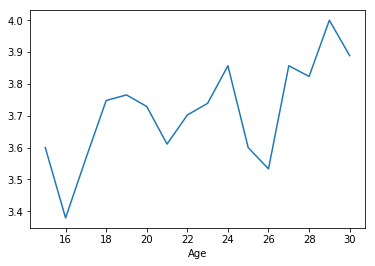

In [8]:
df.groupby(['Age']).mean()['Happiness in life'].plot()

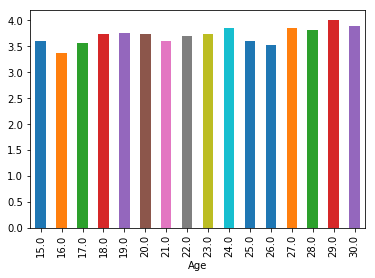

In [9]:
df.groupby(['Age']).mean()['Happiness in life'].plot(kind='bar')

# Seaborn

Теперь давайте перейдем к библиотеке seaborn. Seaborn — это по сути более высокоуровневое API на базе библиотеки matplotlib. Seaborn содержит более адекватные дефолтные настройки оформления графиков. Также в библиотеке есть достаточно сложные типы визуализации, которые в matplotlib потребовали бы большого количество кода.

## Distplot - Распределение

Первое, что стоит анализировать, когда вы получаете новый датасет - это посомтреть распределения интересующих вас признаков.

Для примера рассмотрим распределния возраста, роста, веса.

/Users/ilya/.pyenv/versions/3.7.0/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


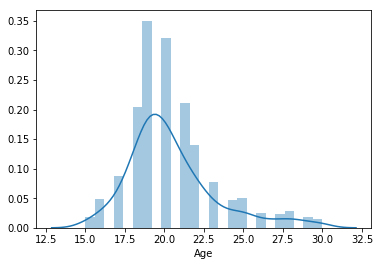

In [10]:
sns.distplot(df['Age'].dropna())

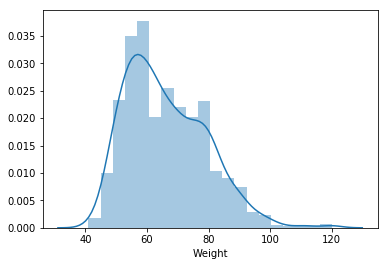

In [11]:
sns.distplot(df['Weight'].dropna())

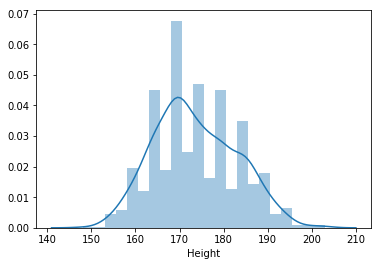

In [12]:
sns.distplot(df['Height'].dropna())

## Jointplot 

Чтобы посмотреть корреляции между двумя признаками, можно рисовать график совместого распределения. По сути дела это комбинация scatter-plot в центре и distribution по осям.

Можно даже обнаружить выбросы (те объекты, которые сильно не похожи на остальных).



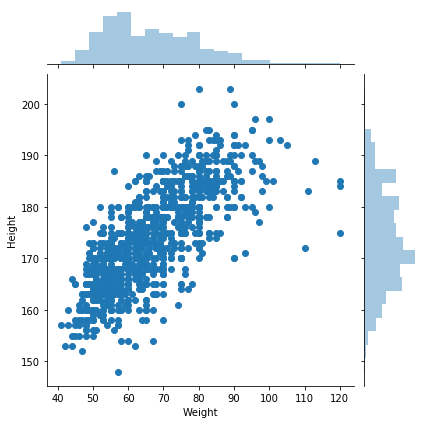

In [13]:
sns.jointplot(x='Weight', y='Height', data=df)

## Countplot - количество

Если у нас есть некоторый категориальный признак, мы можем посмотреть на количественное соотношение по нему.  
Очень важно смотреть на сбалансированность выборки, поэтому count plot вы будете использовать часто.

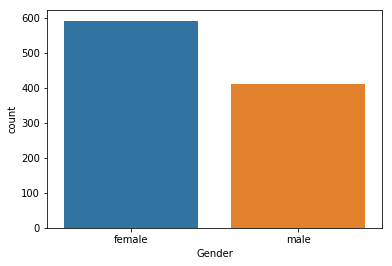

In [14]:
sns.countplot(x='Gender', data=df)

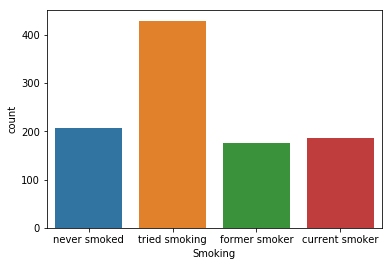

In [15]:
sns.countplot(x='Smoking', data=df)

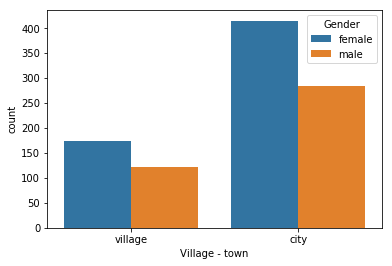

In [16]:
sns.countplot(x='Village - town', data=df, hue='Gender') # можно указать hue для группировки

Посмотрим, кто боится пауков больше? Женщины или мужчины?

spoiler: судя по всему женщины.

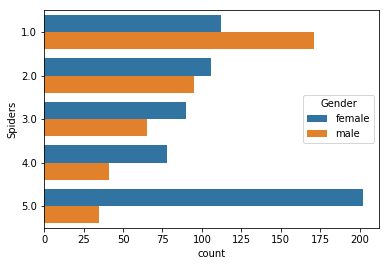

In [17]:
sns.countplot(y='Spiders', data=df, hue='Gender') # можно указать hue для группировки

## Линейная взаимосвязь

Если мы хотим посмотреть, есть ли некоторая линейная зависимость между признаками, то lmplot поможет это оценить.  
Он строит scatter-plot - набор точек по x,y и проводит прямую так, чтобы они лучше всего описывала характер расположения точек. Величина разброса показывается фоновым лучом.

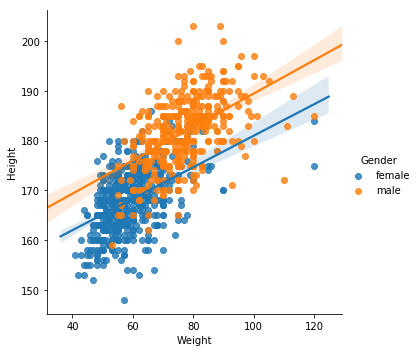

In [18]:
# ясно что рост и вес сильно коррелируют
sns.lmplot(x='Weight', y='Height', hue='Gender', data=df)

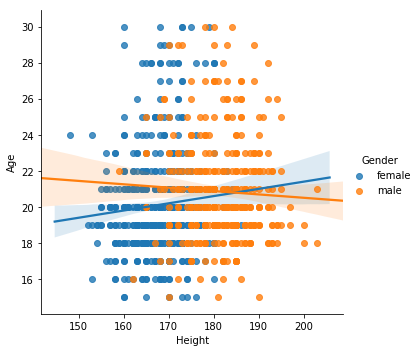

In [19]:
# а вот между ростом и возрастом корреляции нет. По крайней мере в этом датасете.
sns.lmplot(x='Height', y='Age', hue='Gender', data=df)

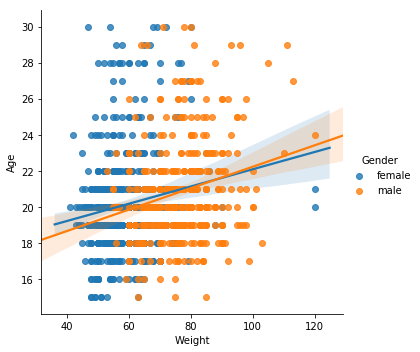

In [20]:
# Казалось бы! Но чем старше человек, тем он тяжелее. Так что занимайтесь спортом!
sns.lmplot(x='Weight', y='Age', hue='Gender', data=df)

## Boxplot

Ящик с усами или диаграмма размаха - компактное отображение распределения вероятности.
Показывает медиану, нижний и верхний квантили, минимальное и максимальное значение выборки и выбросы.

Box plot состоит из коробки (поэтому он и называется box plot), усиков и точек. 

Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили. Черта внутри коробки обозначает медиану распределения.

Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток (Q1 - 1.5*IQR, Q3 + 1.5*IQR), где IQR = Q3 - Q1 — интерквартильный размах. 

Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, заданный усами графика.

![](https://habrastorage.org/files/d0f/f53/8d5/d0ff538d59154901b18a98469de07fde.png)

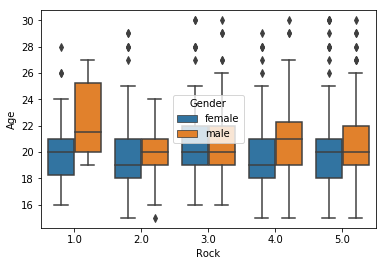

In [21]:
# Видно, что любят Рок девушки по-старше и это считается аномалией (точки на графике)
# А не любят его сильно в среднем межчины по-старше!

sns.boxplot(x='Rock', y='Age', hue='Gender', data=df)

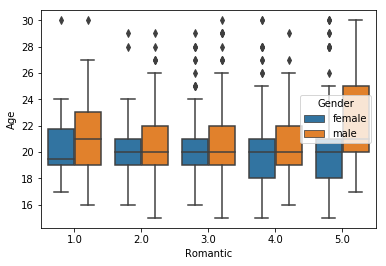

In [22]:
sns.boxplot(x='Romantic', y='Age', hue='Gender', data=df)

# Violinplot

Еще один способ смотреть на два распределения сразу - это Violinplot.

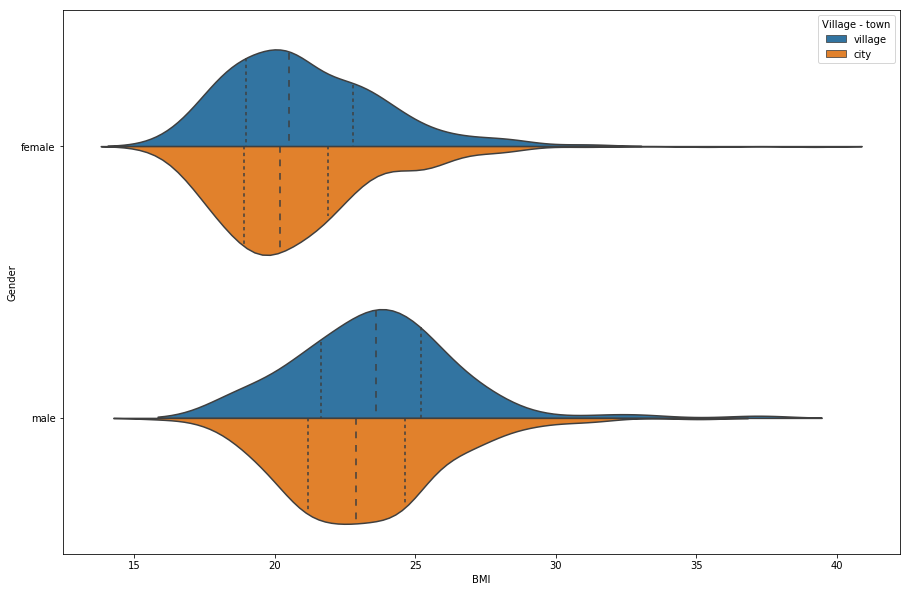

In [23]:
# В городе люди обычно более худые? Интересно.

plt.figure(figsize=(15,10))
sns.violinplot(y='Gender', x='BMI', hue='Village - town', data=df, split=True, inner = 'quartile')

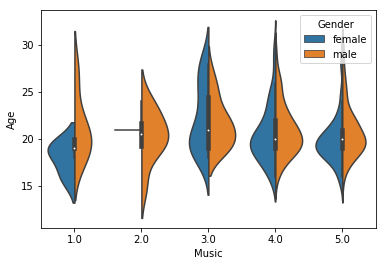

In [24]:
# Мужчин которые не любят музыку больше чем женщин. 

sns.violinplot(x='Music', y='Age', hue='Gender', data=df, split=True)

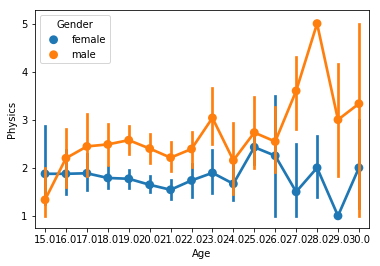

In [25]:
sns.pointplot(x='Age', y='Physics', hue='Gender', data=df)

In [26]:
music = df.iloc[:, 2:19]
music.head()

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
1,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0
2,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0
3,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0
4,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0


In [27]:
# сколько пропусков в музыкальных предпочтениях

music.isnull().sum()

Dance                4
Folk                 5
Country              5
Classical music      7
Musical              2
Pop                  3
Rock                 6
Metal or Hardrock    3
Punk                 8
Hiphop, Rap          4
Reggae, Ska          7
Swing, Jazz          6
Rock n roll          7
Alternative          7
Latino               8
Techno, Trance       7
Opera                1
dtype: int64

In [28]:
music.dropna(inplace=True)

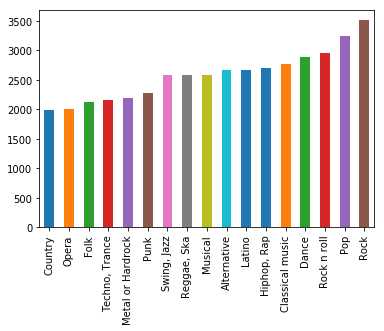

In [29]:
# Что любят больше всего?
music.sum().sort_values().plot(kind='bar')

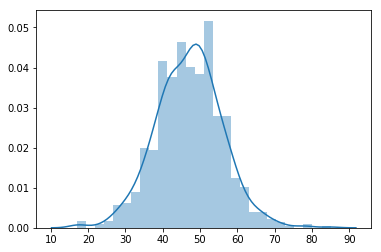

In [30]:
# распределение любви музыки.
# Классическое нормальное распределение. То есть в среднем люди любят 9 жанров из 17

sns.distplot(music.sum(axis=1))

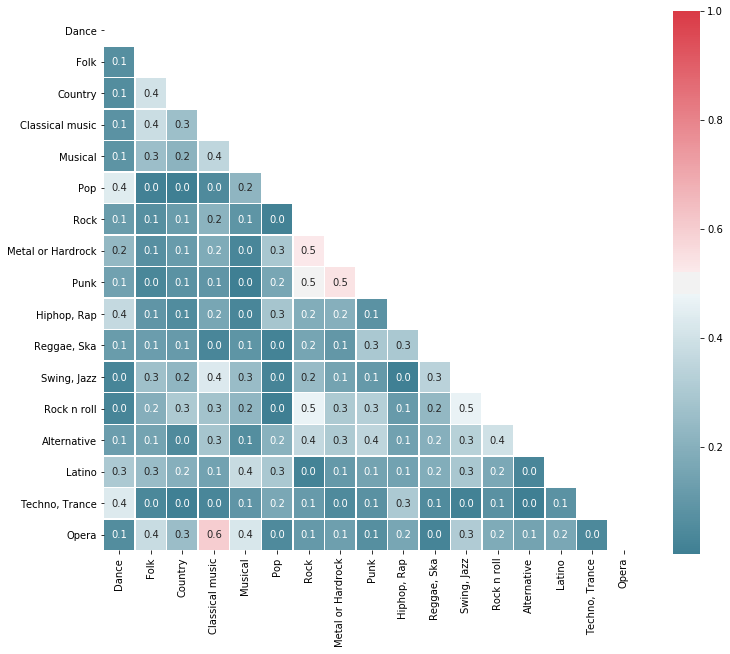

In [31]:
# Существует ли корреляция между предпочтениями в музыке? Чем больше число по модулю, тем больше корреляиця
corr = music.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(np.abs(corr),cmap=cmap, square=True,linewidths=.5, mask=mask,annot=True, fmt=".1f") # возьмем abs значение, чтобы нас не смущали отрицительные корреляции